# World Happiness Report Analysis


---

### Dataset Information:
- **2015.csv**: Contains 12 columns including Happiness Rank, Score, and various factors
- **2016-2017.csv**: Contains similar happiness metrics with slight variations
- **2018-2019.csv**: Contains 9 columns with Overall rank, Score, and contributing factors

---

## Question 1: Data Loading and Initial Exploration

### Tasks:
**a)** Load all five CSV files (2015.csv to 2019.csv) into separate DataFrames

**b)** Display the shape, column names, and first 3 rows of each dataset

**c)** Check for missing values in all datasets and display a summary

**d)** Identify the common columns across all five datasets

---

### Solution 1:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [2]:
# a) Load all five CSV files
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

print("✓ All datasets loaded successfully!")

✓ All datasets loaded successfully!


In [3]:
# b) Display shape, columns, and first 3 rows for each dataset
datasets = {
    '2015': df_2015,
    '2016': df_2016,
    '2017': df_2017,
    '2018': df_2018,
    '2019': df_2019
}

for year, df in datasets.items():
    print(f"\n{'='*80}")
    print(f"DATASET: {year}")
    print(f"{'='*80}")
    print(f"\nShape: {df.shape}")
    print(f"\nColumns ({len(df.columns)} total):")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i}. {col}")
    print(f"\nFirst 3 rows:")
    print(df.head(3))


DATASET: 2015

Shape: (158, 12)

Columns (12 total):
  1. Country
  2. Region
  3. Happiness Rank
  4. Happiness Score
  5. Standard Error
  6. Economy (GDP per Capita)
  7. Family
  8. Health (Life Expectancy)
  9. Freedom
  10. Trust (Government Corruption)
  11. Generosity
  12. Dystopia Residual

First 3 rows:
       Country          Region  Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual
0  Switzerland  Western Europe               1            7.587         0.03411                   1.39651  1.34951                   0.94143  0.66557                        0.41978     0.29678            2.51738
1      Iceland  Western Europe               2            7.561         0.04884                   1.30232  1.40223                   0.94784  0.62877                        0.14145     0.43630            2.70201
2      Denmark  Western Europe               3 

In [4]:
# c) Check for missing values
print("\n" + "="*80)
print("MISSING VALUES SUMMARY")
print("="*80)

for year, df in datasets.items():
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\n{year}:")
        print(missing[missing > 0])
    else:
        print(f"\n{year}: No missing values ✓")


MISSING VALUES SUMMARY

2015: No missing values ✓

2016: No missing values ✓

2017: No missing values ✓

2018:
Perceptions of corruption    1
dtype: int64

2019: No missing values ✓


In [5]:
# d) Identify common columns across all datasets
# Normalize column names for comparison (lowercase and strip spaces)
cols_2015 = set([col.lower().strip() for col in df_2015.columns])
cols_2016 = set([col.lower().strip() for col in df_2016.columns])
cols_2017 = set([col.lower().strip() for col in df_2017.columns])
cols_2018 = set([col.lower().strip() for col in df_2018.columns])
cols_2019 = set([col.lower().strip() for col in df_2019.columns])

# Find intersection
common_cols = cols_2015 & cols_2016 & cols_2017 & cols_2018 & cols_2019

print("\n" + "="*80)
print("COMMON COLUMNS ACROSS ALL DATASETS")
print("="*80)
print(f"\nNote: Column names vary across years, but conceptually similar columns exist:")
print(f"- Country/Region identifier")
print(f"- Happiness Score/Rank")
print(f"- GDP per Capita")
print(f"- Social Support/Family")
print(f"- Health/Life Expectancy")
print(f"- Freedom")
print(f"- Generosity")
print(f"- Trust/Corruption")

print(f"\nExact matching columns (case-insensitive): {len(common_cols)}")
if common_cols:
    for col in sorted(common_cols):
        print(f"  - {col}")


COMMON COLUMNS ACROSS ALL DATASETS

Note: Column names vary across years, but conceptually similar columns exist:
- Country/Region identifier
- Happiness Score/Rank
- GDP per Capita
- Social Support/Family
- Health/Life Expectancy
- Freedom
- Generosity
- Trust/Corruption

Exact matching columns (case-insensitive): 1
  - generosity


---

## Question 2: Data Cleaning and Preparation

### Tasks:
**a)** Standardize the column names across all datasets to make them consistent. Create a mapping for similar columns (e.g., 'Country' in 2015 vs 'Country or region' in 2019)

**b)** Add a 'Year' column to each dataset indicating the year of the data

**c)** Combine all five datasets into a single DataFrame called `df_combined`

**d)** Handle any missing values appropriately and verify the final shape of the combined dataset

---

### Solution 2:

In [6]:
# a) Standardize column names
# Create standardized column mappings

# For 2015
df_2015_clean = df_2015.copy()
df_2015_clean = df_2015_clean.rename(columns={
    'Country': 'Country',
    'Happiness Rank': 'Rank',
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'GDP',
    'Family': 'Social_Support',
    'Health (Life Expectancy)': 'Health',
    'Freedom': 'Freedom',
    'Trust (Government Corruption)': 'Trust',
    'Generosity': 'Generosity'
})

# For 2016
df_2016_clean = df_2016.copy()
df_2016_clean = df_2016_clean.rename(columns={
    'Country': 'Country',
    'Happiness Rank': 'Rank',
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'GDP',
    'Family': 'Social_Support',
    'Health (Life Expectancy)': 'Health',
    'Freedom': 'Freedom',
    'Trust (Government Corruption)': 'Trust',
    'Generosity': 'Generosity'
})

# For 2017
df_2017_clean = df_2017.copy()
df_2017_clean = df_2017_clean.rename(columns={
    'Country': 'Country',
    'Happiness.Rank': 'Rank',
    'Happiness.Score': 'Score',
    'Economy..GDP.per.Capita.': 'GDP',
    'Family': 'Social_Support',
    'Health..Life.Expectancy.': 'Health',
    'Freedom': 'Freedom',
    'Trust..Government.Corruption.': 'Trust',
    'Generosity': 'Generosity'
})

# For 2018
df_2018_clean = df_2018.copy()
df_2018_clean = df_2018_clean.rename(columns={
    'Country or region': 'Country',
    'Overall rank': 'Rank',
    'Score': 'Score',
    'GDP per capita': 'GDP',
    'Social support': 'Social_Support',
    'Healthy life expectancy': 'Health',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust',
    'Generosity': 'Generosity'
})

# For 2019
df_2019_clean = df_2019.copy()
df_2019_clean = df_2019_clean.rename(columns={
    'Country or region': 'Country',
    'Overall rank': 'Rank',
    'Score': 'Score',
    'GDP per capita': 'GDP',
    'Social support': 'Social_Support',
    'Healthy life expectancy': 'Health',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust',
    'Generosity': 'Generosity'
})

print("✓ Column names standardized across all datasets!")
print("\nStandardized columns:")
print("  - Country")
print("  - Rank")
print("  - Score")
print("  - GDP")
print("  - Social_Support")
print("  - Health")
print("  - Freedom")
print("  - Trust")
print("  - Generosity")

✓ Column names standardized across all datasets!

Standardized columns:
  - Country
  - Rank
  - Score
  - GDP
  - Social_Support
  - Health
  - Freedom
  - Trust
  - Generosity


In [7]:
# b) Add Year column to each dataset
df_2015_clean['Year'] = 2015
df_2016_clean['Year'] = 2016
df_2017_clean['Year'] = 2017
df_2018_clean['Year'] = 2018
df_2019_clean['Year'] = 2019

print("✓ Year column added to all datasets!")

✓ Year column added to all datasets!


In [8]:
# c) Combine all datasets
# Select only common columns
common_columns = ['Country', 'Rank', 'Score', 'GDP', 'Social_Support', 
                  'Health', 'Freedom', 'Trust', 'Generosity', 'Year']

df_combined = pd.concat([
    df_2015_clean[common_columns],
    df_2016_clean[common_columns],
    df_2017_clean[common_columns],
    df_2018_clean[common_columns],
    df_2019_clean[common_columns]
], ignore_index=True)

print("✓ All datasets combined successfully!")
print(f"\nCombined dataset shape: {df_combined.shape}")
print(f"\nFirst few rows:")
print(df_combined.head())
print(f"\nLast few rows:")
print(df_combined.tail())

✓ All datasets combined successfully!

Combined dataset shape: (782, 10)

First few rows:
       Country  Rank  Score      GDP  Social_Support   Health  Freedom    Trust  Generosity  Year
0  Switzerland     1  7.587  1.39651         1.34951  0.94143  0.66557  0.41978     0.29678  2015
1      Iceland     2  7.561  1.30232         1.40223  0.94784  0.62877  0.14145     0.43630  2015
2      Denmark     3  7.527  1.32548         1.36058  0.87464  0.64938  0.48357     0.34139  2015
3       Norway     4  7.522  1.45900         1.33095  0.88521  0.66973  0.36503     0.34699  2015
4       Canada     5  7.427  1.32629         1.32261  0.90563  0.63297  0.32957     0.45811  2015

Last few rows:
                      Country  Rank  Score    GDP  Social_Support  Health  Freedom  Trust  Generosity  Year
777                    Rwanda   152  3.334  0.359           0.711   0.614    0.555  0.411       0.217  2019
778                  Tanzania   153  3.231  0.476           0.885   0.499    0.417  0.147 

In [9]:
# d) Handle missing values
print("Missing values before cleaning:")
print(df_combined.isnull().sum())

# Drop rows with missing values
df_combined_clean = df_combined.dropna()

print(f"\n✓ Missing values handled!")
print(f"\nShape before cleaning: {df_combined.shape}")
print(f"Shape after cleaning: {df_combined_clean.shape}")
print(f"Rows removed: {df_combined.shape[0] - df_combined_clean.shape[0]}")

# Update the main combined dataframe
df_combined = df_combined_clean.copy()

print(f"\nFinal dataset info:")
print(df_combined.info())

Missing values before cleaning:
Country           0
Rank              0
Score             0
GDP               0
Social_Support    0
Health            0
Freedom           0
Trust             1
Generosity        0
Year              0
dtype: int64

✓ Missing values handled!

Shape before cleaning: (782, 10)
Shape after cleaning: (781, 10)
Rows removed: 1

Final dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 781
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         781 non-null    object 
 1   Rank            781 non-null    int64  
 2   Score           781 non-null    float64
 3   GDP             781 non-null    float64
 4   Social_Support  781 non-null    float64
 5   Health          781 non-null    float64
 6   Freedom         781 non-null    float64
 7   Trust           781 non-null    float64
 8   Generosity      781 non-null    float64
 9   Year            781 non-n

---

## Question 3: Exploratory Data Analysis

### Tasks:
**a)** Calculate and display descriptive statistics (mean, median, std, min, max) for the 'Score' column for each year

**b)** Identify the top 10 happiest countries in 2019 and visualize them using a horizontal bar chart

**c)** Find which country showed the maximum improvement in happiness score from 2015 to 2019

**d)** Create a line plot showing the trend of average happiness score across all years (2015-2019)

---

### Solution 3:

DESCRIPTIVE STATISTICS FOR HAPPINESS SCORE BY YEAR

        Mean  Median  Std Dev    Min    Max  Count
Year                                             
2015  5.376   5.232    1.145  2.839  7.587    158
2016  5.382   5.314    1.142  2.905  7.526    157
2017  5.354   5.279    1.131  2.693  7.537    155
2018  5.367   5.358    1.117  2.905  7.632    155
2019  5.407   5.380    1.113  2.853  7.769    156


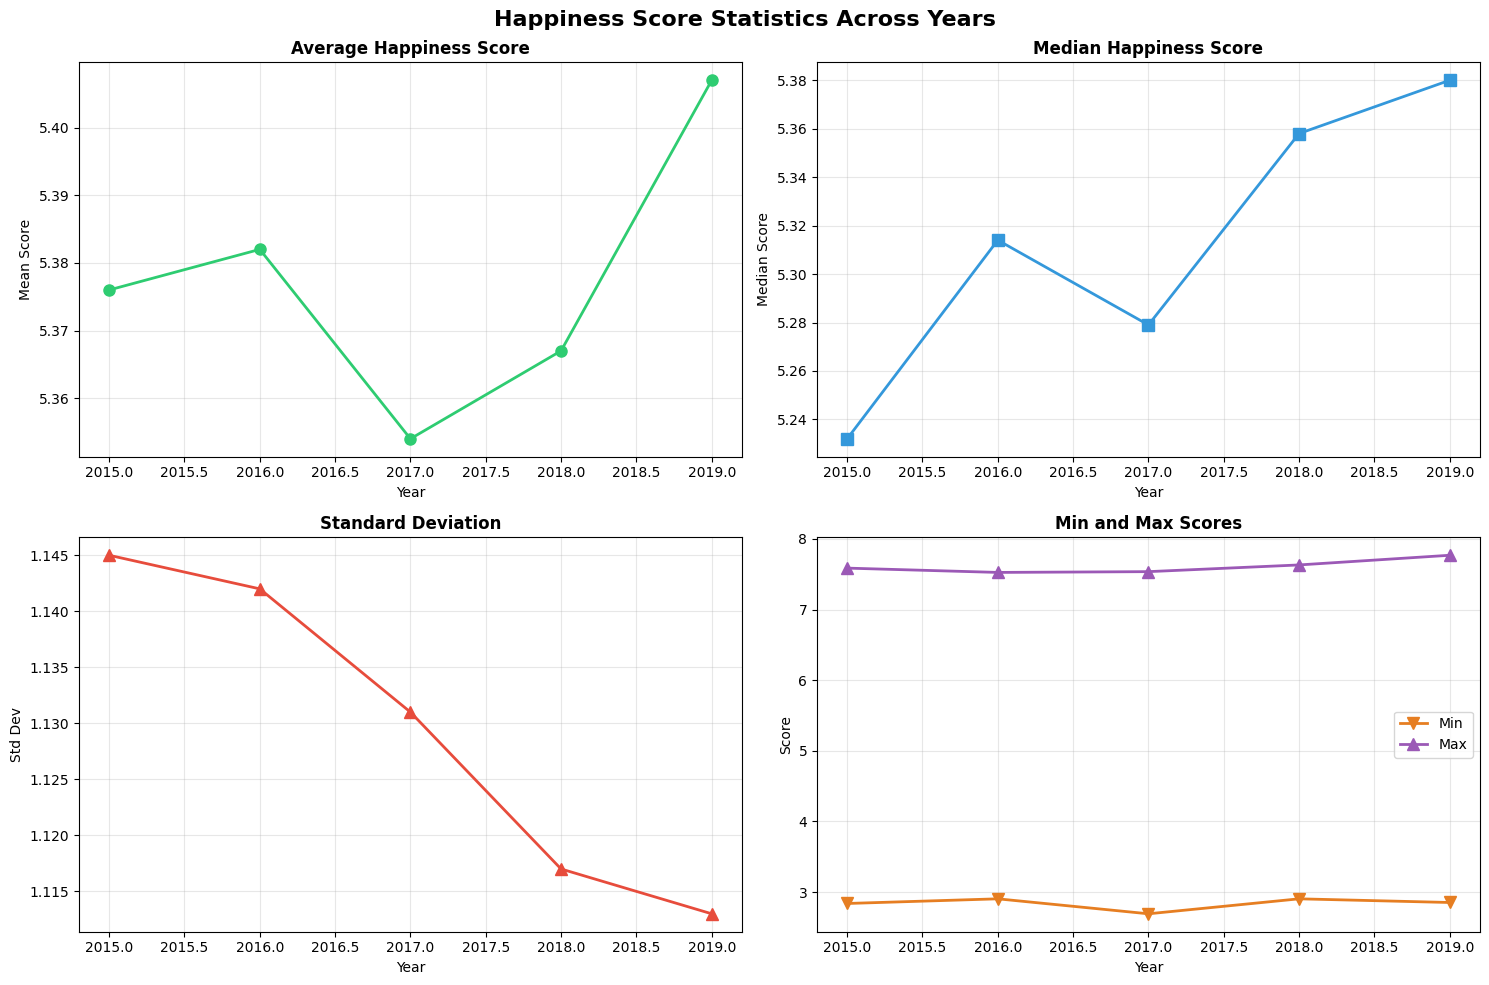

In [10]:
# a) Descriptive statistics for Score by year
print("="*80)
print("DESCRIPTIVE STATISTICS FOR HAPPINESS SCORE BY YEAR")
print("="*80)

stats_by_year = df_combined.groupby('Year')['Score'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Count', 'count')
]).round(3)

print("\n", stats_by_year)

# Visualize the statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Happiness Score Statistics Across Years', fontsize=16, fontweight='bold')

# Mean
axes[0, 0].plot(stats_by_year.index, stats_by_year['Mean'], marker='o', linewidth=2, markersize=8, color='#2ecc71')
axes[0, 0].set_title('Average Happiness Score', fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Mean Score')
axes[0, 0].grid(True, alpha=0.3)

# Median
axes[0, 1].plot(stats_by_year.index, stats_by_year['Median'], marker='s', linewidth=2, markersize=8, color='#3498db')
axes[0, 1].set_title('Median Happiness Score', fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Median Score')
axes[0, 1].grid(True, alpha=0.3)

# Standard Deviation
axes[1, 0].plot(stats_by_year.index, stats_by_year['Std Dev'], marker='^', linewidth=2, markersize=8, color='#e74c3c')
axes[1, 0].set_title('Standard Deviation', fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Std Dev')
axes[1, 0].grid(True, alpha=0.3)

# Min and Max
axes[1, 1].plot(stats_by_year.index, stats_by_year['Min'], marker='v', linewidth=2, markersize=8, label='Min', color='#e67e22')
axes[1, 1].plot(stats_by_year.index, stats_by_year['Max'], marker='^', linewidth=2, markersize=8, label='Max', color='#9b59b6')
axes[1, 1].set_title('Min and Max Scores', fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

TOP 10 HAPPIEST COUNTRIES IN 2019
    Country  Score  Rank
    Finland  7.769     1
    Denmark  7.600     2
     Norway  7.554     3
    Iceland  7.494     4
Netherlands  7.488     5
Switzerland  7.480     6
     Sweden  7.343     7
New Zealand  7.307     8
     Canada  7.278     9
    Austria  7.246    10


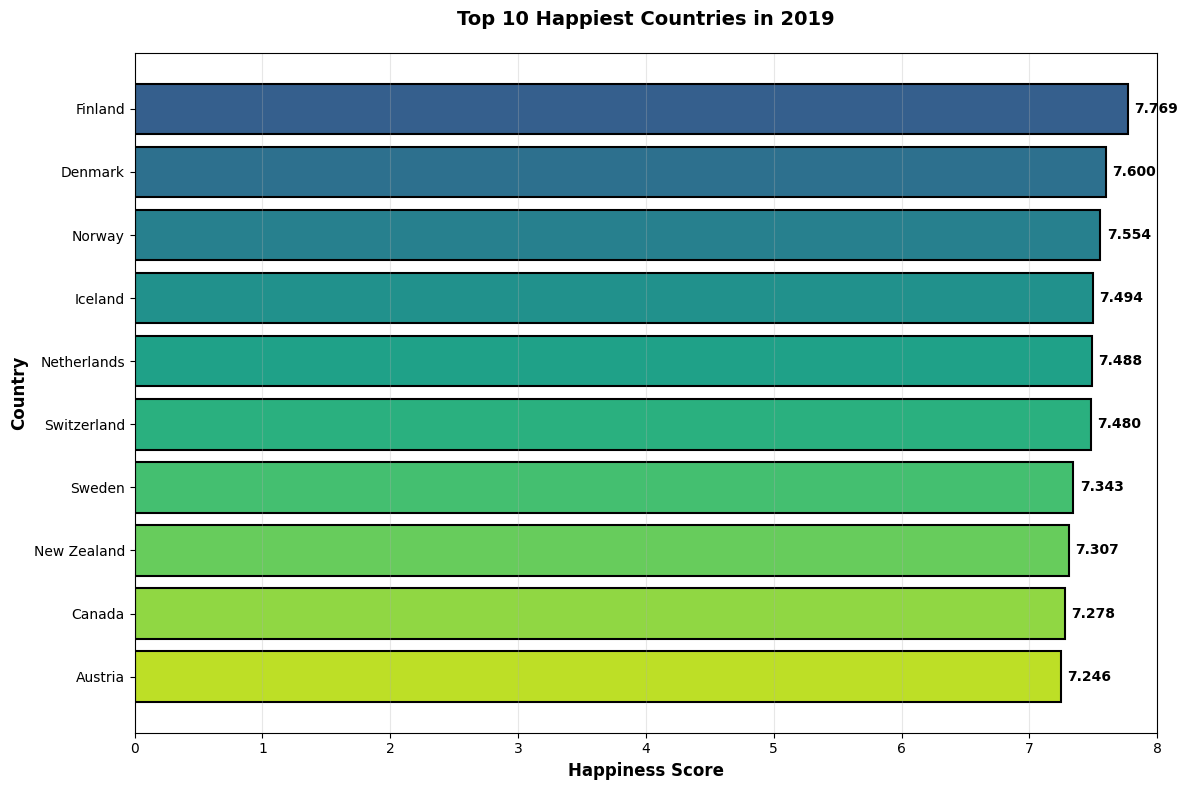

In [11]:
# b) Top 10 happiest countries in 2019
top_10_2019 = df_combined[df_combined['Year'] == 2019].nlargest(10, 'Score')[['Country', 'Score', 'Rank']]

print("="*80)
print("TOP 10 HAPPIEST COUNTRIES IN 2019")
print("="*80)
print(top_10_2019.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, 10))
bars = plt.barh(top_10_2019['Country'], top_10_2019['Score'], color=colors, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (score, country) in enumerate(zip(top_10_2019['Score'], top_10_2019['Country'])):
    plt.text(score + 0.05, i, f'{score:.3f}', va='center', fontweight='bold', fontsize=10)

plt.xlabel('Happiness Score', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 10 Happiest Countries in 2019', fontsize=14, fontweight='bold', pad=20)
plt.xlim(0, 8)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

COUNTRIES WITH MAXIMUM IMPROVEMENT (2015 to 2019)

Top 10 Most Improved:
     Country  Score_2015  Score_2019  Improvement
       Benin       3.340       4.883        1.543
 Ivory Coast       3.655       4.944        1.289
        Togo       2.839       4.085        1.246
    Honduras       4.788       5.860        1.072
Burkina Faso       3.587       4.587        1.000
     Hungary       4.800       5.758        0.958
     Romania       5.124       6.070        0.946
       Gabon       3.896       4.799        0.903
    Cambodia       3.819       4.700        0.881
      Guinea       3.656       4.534        0.878


Top 10 Most Declined:
  Country  Score_2015  Score_2019  Improvement
Swaziland       4.867       4.212       -0.655
   Brazil       6.983       6.300       -0.683
    Yemen       4.077       3.380       -0.697
 Botswana       4.332       3.488       -0.844
   Malawi       4.292       3.410       -0.882
    Haiti       4.518       3.597       -0.921
 Zimbabwe       4.610   

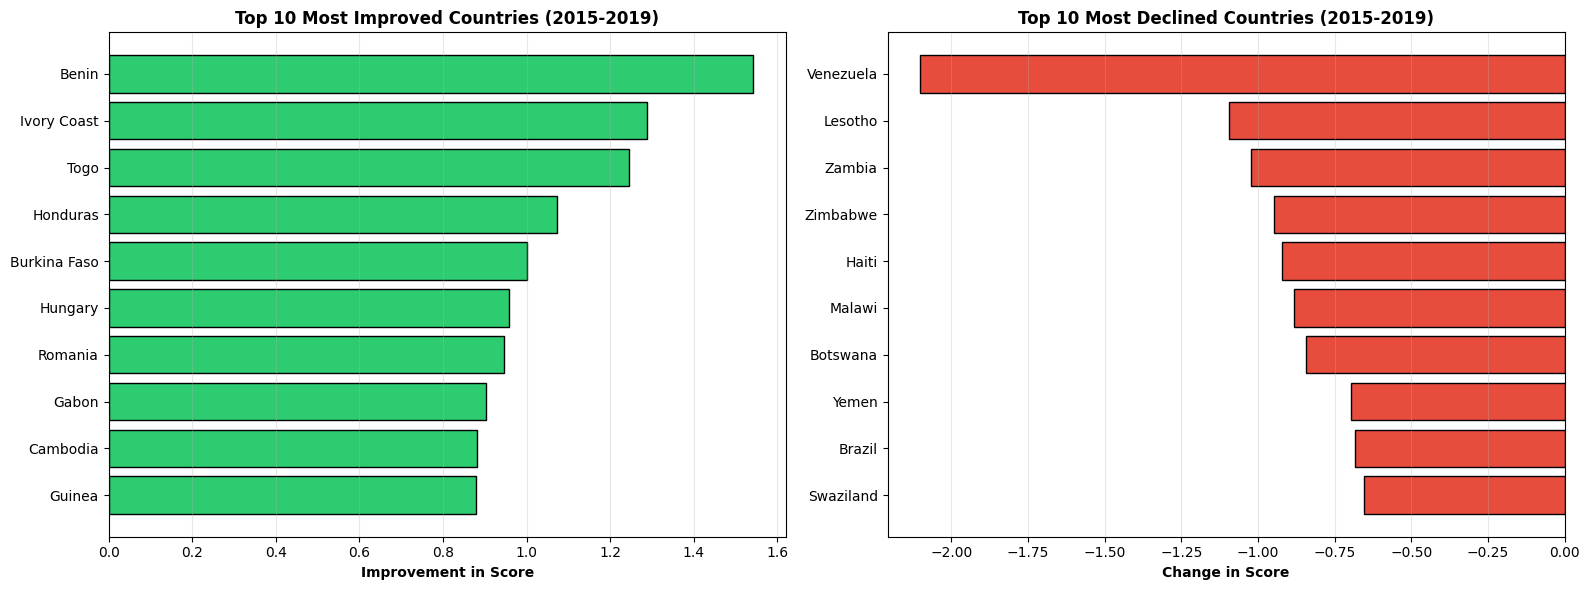


🏆 Maximum Improvement: Benin (+1.543)
📉 Maximum Decline: Venezuela (-2.103)


In [12]:
# c) Country with maximum improvement from 2015 to 2019
# Get 2015 and 2019 data
df_2015_scores = df_combined[df_combined['Year'] == 2015][['Country', 'Score']].rename(columns={'Score': 'Score_2015'})
df_2019_scores = df_combined[df_combined['Year'] == 2019][['Country', 'Score']].rename(columns={'Score': 'Score_2019'})

# Merge to find common countries
comparison = pd.merge(df_2015_scores, df_2019_scores, on='Country', how='inner')
comparison['Improvement'] = comparison['Score_2019'] - comparison['Score_2015']
comparison = comparison.sort_values('Improvement', ascending=False)

print("="*80)
print("COUNTRIES WITH MAXIMUM IMPROVEMENT (2015 to 2019)")
print("="*80)
print("\nTop 10 Most Improved:")
print(comparison.head(10).to_string(index=False))

print("\n\nTop 10 Most Declined:")
print(comparison.tail(10).to_string(index=False))

# Visualize top improvers and decliners
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top improvers
top_improvers = comparison.head(10)
ax1.barh(top_improvers['Country'], top_improvers['Improvement'], color='#2ecc71', edgecolor='black')
ax1.set_xlabel('Improvement in Score', fontweight='bold')
ax1.set_title('Top 10 Most Improved Countries (2015-2019)', fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Top decliners
top_decliners = comparison.tail(10).sort_values('Improvement')
ax2.barh(top_decliners['Country'], top_decliners['Improvement'], color='#e74c3c', edgecolor='black')
ax2.set_xlabel('Change in Score', fontweight='bold')
ax2.set_title('Top 10 Most Declined Countries (2015-2019)', fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🏆 Maximum Improvement: {comparison.iloc[0]['Country']} (+{comparison.iloc[0]['Improvement']:.3f})")
print(f"📉 Maximum Decline: {comparison.iloc[-1]['Country']} ({comparison.iloc[-1]['Improvement']:.3f})")

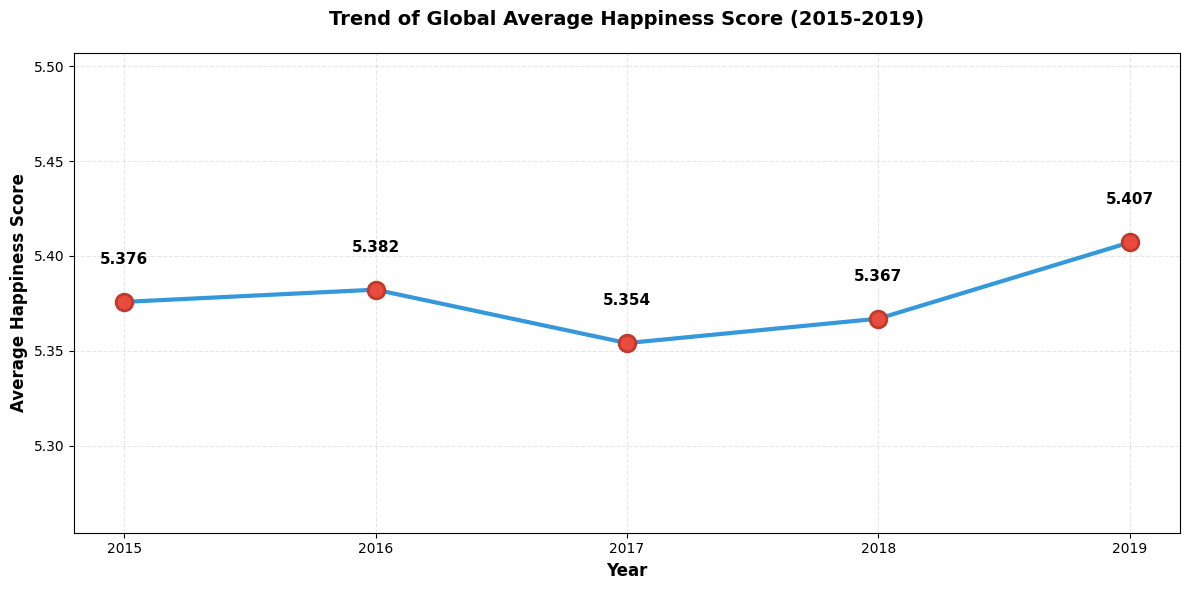


Insight:
✓ Global happiness has INCREASED from 5.376 (2015) to 5.407 (2019)


In [13]:
# d) Trend of average happiness score across years
avg_score_by_year = df_combined.groupby('Year')['Score'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_score_by_year['Year'], avg_score_by_year['Score'], 
         marker='o', linewidth=3, markersize=12, color='#3498db', 
         markerfacecolor='#e74c3c', markeredgewidth=2, markeredgecolor='#c0392b')

# Add value labels
for year, score in zip(avg_score_by_year['Year'], avg_score_by_year['Score']):
    plt.text(year, score + 0.02, f'{score:.3f}', ha='center', fontweight='bold', fontsize=11)

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Happiness Score', fontsize=12, fontweight='bold')
plt.title('Trend of Global Average Happiness Score (2015-2019)', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(avg_score_by_year['Year'])
plt.ylim(avg_score_by_year['Score'].min() - 0.1, avg_score_by_year['Score'].max() + 0.1)
plt.tight_layout()
plt.show()

print("\nInsight:")
if avg_score_by_year['Score'].iloc[-1] > avg_score_by_year['Score'].iloc[0]:
    print(f"✓ Global happiness has INCREASED from {avg_score_by_year['Score'].iloc[0]:.3f} (2015) to {avg_score_by_year['Score'].iloc[-1]:.3f} (2019)")
else:
    print(f"✗ Global happiness has DECREASED from {avg_score_by_year['Score'].iloc[0]:.3f} (2015) to {avg_score_by_year['Score'].iloc[-1]:.3f} (2019)")

---

## Question 4: Correlation and Factor Analysis

### Tasks:
**a)** Calculate the correlation between happiness score and all contributing factors (GDP, Social Support, Health, Freedom, Trust, Generosity) for the year 2019

**b)** Create a heatmap to visualize the correlation matrix

**c)** Identify which factor has the strongest correlation with happiness score

**d)** Create scatter plots showing the relationship between the top 3 factors and happiness score

---

### Solution 4:

In [14]:
# a) Calculate correlation for 2019
df_2019_analysis = df_combined[df_combined['Year'] == 2019].copy()

# Select relevant columns
factors = ['Score', 'GDP', 'Social_Support', 'Health', 'Freedom', 'Trust', 'Generosity']
correlation_data = df_2019_analysis[factors]

# Calculate correlation with Score
correlations = correlation_data.corr()['Score'].sort_values(ascending=False)

print("="*80)
print("CORRELATION WITH HAPPINESS SCORE (2019)")
print("="*80)
print(correlations)
print("\n")

CORRELATION WITH HAPPINESS SCORE (2019)
Score             1.000000
GDP               0.793883
Health            0.779883
Social_Support    0.777058
Freedom           0.566742
Trust             0.385613
Generosity        0.075824
Name: Score, dtype: float64




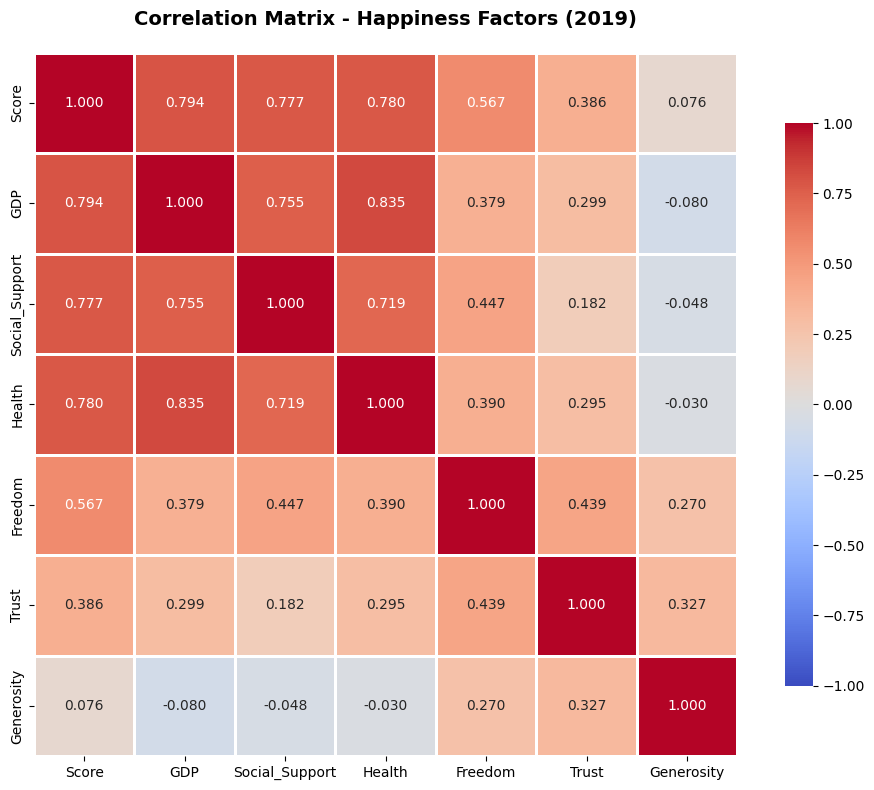

In [15]:
# b) Create correlation heatmap
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix - Happiness Factors (2019)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [16]:
# c) Identify strongest correlations
# Exclude Score itself
factor_correlations = correlations.drop('Score')

print("="*80)
print("FACTORS RANKED BY CORRELATION STRENGTH")
print("="*80)
for i, (factor, corr) in enumerate(factor_correlations.items(), 1):
    print(f"{i}. {factor:20s}: {corr:.4f}")

print(f"\n🏆 Strongest Factor: {factor_correlations.index[0]} (r = {factor_correlations.iloc[0]:.4f})")
print(f"📊 This indicates a {'strong' if abs(factor_correlations.iloc[0]) > 0.7 else 'moderate'} positive relationship")

FACTORS RANKED BY CORRELATION STRENGTH
1. GDP                 : 0.7939
2. Health              : 0.7799
3. Social_Support      : 0.7771
4. Freedom             : 0.5667
5. Trust               : 0.3856
6. Generosity          : 0.0758

🏆 Strongest Factor: GDP (r = 0.7939)
📊 This indicates a strong positive relationship


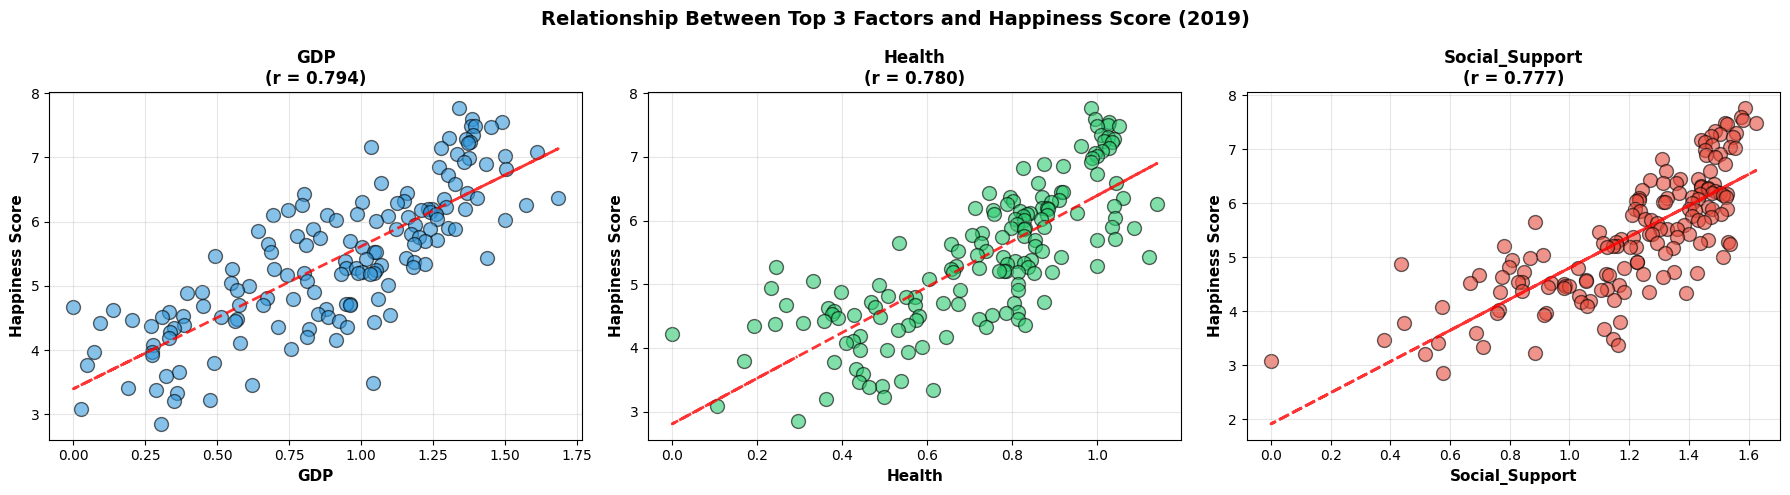

In [17]:
# d) Scatter plots for top 3 factors
top_3_factors = factor_correlations.head(3).index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relationship Between Top 3 Factors and Happiness Score (2019)', 
             fontsize=14, fontweight='bold')

colors = ['#3498db', '#2ecc71', '#e74c3c']

for i, factor in enumerate(top_3_factors):
    axes[i].scatter(df_2019_analysis[factor], df_2019_analysis['Score'], 
                   alpha=0.6, s=100, color=colors[i], edgecolors='black', linewidth=1)
    
    # Add regression line
    z = np.polyfit(df_2019_analysis[factor], df_2019_analysis['Score'], 1)
    p = np.poly1d(z)
    axes[i].plot(df_2019_analysis[factor], p(df_2019_analysis[factor]), 
                "r--", linewidth=2, alpha=0.8)
    
    axes[i].set_xlabel(factor, fontweight='bold', fontsize=11)
    axes[i].set_ylabel('Happiness Score', fontweight='bold', fontsize=11)
    axes[i].set_title(f'{factor}\n(r = {factor_correlations[factor]:.3f})', 
                     fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## Question 5: Advanced Analysis and Insights

### Tasks:
**a)** Group countries by region (you can create regions based on country names or use external knowledge). Calculate average happiness score for each region in 2019

**b)** Create a box plot comparing the distribution of happiness scores across all years (2015-2019)

**c)** Identify any outliers in the 2019 happiness scores using the IQR method and list them

**d)** Write a brief summary (150-200 words) of your key findings from this analysis

---

### Solution 5:

AVERAGE HAPPINESS SCORE BY REGION (2019)
               Average_Score  Country_Count
Region                                     
Oceania                7.268              2
North America          6.922              3
Europe                 6.278             41
Latin America          6.079             18
Asia                   5.238             44
Africa                 4.352             46


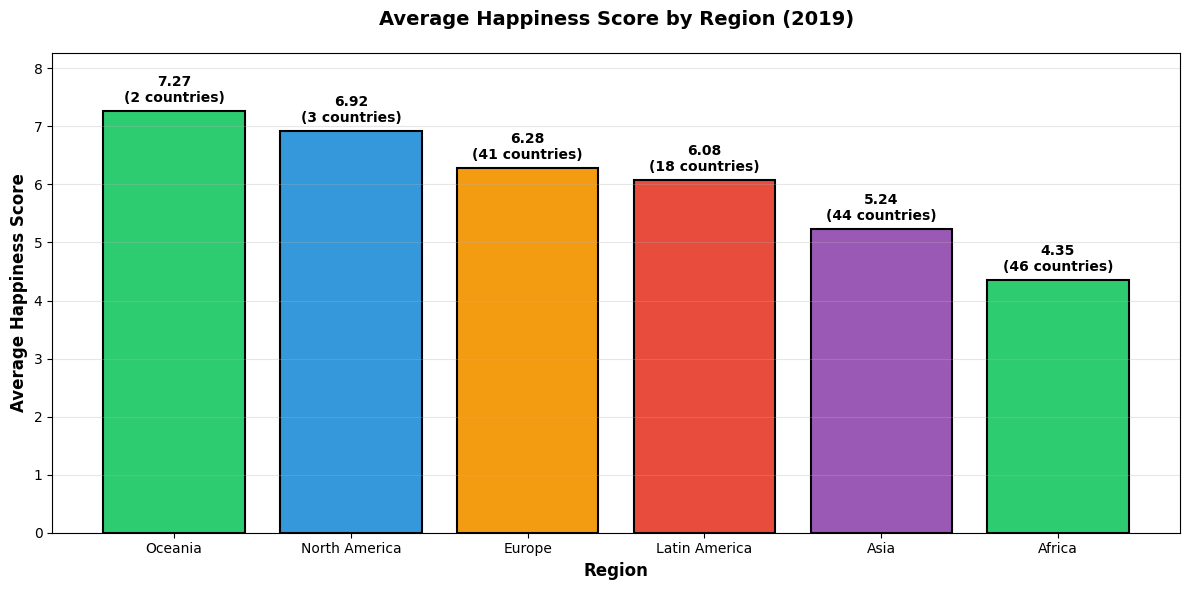

In [18]:
# a) Group by region and calculate average happiness
# Create a simple region mapping based on common knowledge
region_mapping = {
    # Europe
    'Finland': 'Europe', 'Denmark': 'Europe', 'Norway': 'Europe', 'Iceland': 'Europe',
    'Netherlands': 'Europe', 'Switzerland': 'Europe', 'Sweden': 'Europe', 'Austria': 'Europe',
    'Luxembourg': 'Europe', 'United Kingdom': 'Europe', 'Ireland': 'Europe', 'Germany': 'Europe',
    'Belgium': 'Europe', 'Czech Republic': 'Europe', 'Malta': 'Europe', 'France': 'Europe',
    'Spain': 'Europe', 'Slovakia': 'Europe', 'Poland': 'Europe', 'Italy': 'Europe',
    'Russia': 'Europe', 'Lithuania': 'Europe', 'Latvia': 'Europe', 'Romania': 'Europe',
    'Slovenia': 'Europe', 'Cyprus': 'Europe', 'Estonia': 'Europe', 'Portugal': 'Europe',
    'Hungary': 'Europe', 'Croatia': 'Europe', 'Greece': 'Europe', 'Montenegro': 'Europe',
    'Serbia': 'Europe', 'Bulgaria': 'Europe', 'Albania': 'Europe', 'Ukraine': 'Europe',
    'Bosnia and Herzegovina': 'Europe', 'North Macedonia': 'Europe', 'Moldova': 'Europe',
    'Kosovo': 'Europe', 'Northern Cyprus': 'Europe',
    
    # North America
    'Canada': 'North America', 'United States': 'North America', 'Mexico': 'North America',
    
    # Latin America
    'Costa Rica': 'Latin America', 'Brazil': 'Latin America', 'Chile': 'Latin America',
    'Panama': 'Latin America', 'Argentina': 'Latin America', 'Uruguay': 'Latin America',
    'Colombia': 'Latin America', 'El Salvador': 'Latin America', 'Guatemala': 'Latin America',
    'Ecuador': 'Latin America', 'Nicaragua': 'Latin America', 'Paraguay': 'Latin America',
    'Peru': 'Latin America', 'Bolivia': 'Latin America', 'Honduras': 'Latin America',
    'Venezuela': 'Latin America', 'Trinidad & Tobago': 'Latin America', 'Jamaica': 'Latin America',
    
    # Asia
    'Israel': 'Asia', 'United Arab Emirates': 'Asia', 'Singapore': 'Asia', 'Taiwan': 'Asia',
    'Saudi Arabia': 'Asia', 'Qatar': 'Asia', 'Thailand': 'Asia', 'Bahrain': 'Asia',
    'Kuwait': 'Asia', 'Japan': 'Asia', 'South Korea': 'Asia', 'Philippines': 'Asia',
    'Vietnam': 'Asia', 'China': 'Asia', 'Pakistan': 'Asia', 'Indonesia': 'Asia',
    'Mongolia': 'Asia', 'Malaysia': 'Asia', 'Uzbekistan': 'Asia', 'Kazakhstan': 'Asia',
    'Kyrgyzstan': 'Asia', 'Turkmenistan': 'Asia', 'Tajikistan': 'Asia', 'Hong Kong': 'Asia',
    'Lebanon': 'Asia', 'Turkey': 'Asia', 'Jordan': 'Asia', 'Palestinian Territories': 'Asia',
    'Azerbaijan': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Armenia': 'Asia',
    'Georgia': 'Asia', 'Nepal': 'Asia', 'Laos': 'Asia', 'Cambodia': 'Asia',
    'Bangladesh': 'Asia', 'Myanmar': 'Asia', 'Sri Lanka': 'Asia', 'India': 'Asia',
    'Bhutan': 'Asia', 'Afghanistan': 'Asia', 'Syria': 'Asia', 'Yemen': 'Asia',
    
    # Africa
    'Mauritius': 'Africa', 'Libya': 'Africa', 'Nigeria': 'Africa', 'Algeria': 'Africa',
    'Morocco': 'Africa', 'Cameroon': 'Africa', 'Ghana': 'Africa', 'Ivory Coast': 'Africa',
    'Benin': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Gabon': 'Africa', 'South Africa': 'Africa',
    'Senegal': 'Africa', 'Somalia': 'Africa', 'Namibia': 'Africa', 'Niger': 'Africa',
    'Burkina Faso': 'Africa', 'Guinea': 'Africa', 'Gambia': 'Africa', 'Kenya': 'Africa',
    'Mauritania': 'Africa', 'Mozambique': 'Africa', 'Tunisia': 'Africa', 'Congo (Kinshasa)': 'Africa',
    'Mali': 'Africa', 'Sierra Leone': 'Africa', 'Chad': 'Africa', 'Ethiopia': 'Africa',
    'Swaziland': 'Africa', 'Uganda': 'Africa', 'Egypt': 'Africa', 'Zambia': 'Africa',
    'Togo': 'Africa', 'Liberia': 'Africa', 'Comoros': 'Africa', 'Madagascar': 'Africa',
    'Lesotho': 'Africa', 'Burundi': 'Africa', 'Zimbabwe': 'Africa', 'Haiti': 'Africa',
    'Botswana': 'Africa', 'Malawi': 'Africa', 'Rwanda': 'Africa', 'Tanzania': 'Africa',
    'Central African Republic': 'Africa', 'South Sudan': 'Africa',
    
    # Oceania
    'New Zealand': 'Oceania', 'Australia': 'Oceania'
}

# Apply region mapping
df_2019_analysis['Region'] = df_2019_analysis['Country'].map(region_mapping)

# Calculate average by region
region_happiness = df_2019_analysis.groupby('Region').agg({
    'Score': ['mean', 'count']
}).round(3)
region_happiness.columns = ['Average_Score', 'Country_Count']
region_happiness = region_happiness.sort_values('Average_Score', ascending=False)

print("="*80)
print("AVERAGE HAPPINESS SCORE BY REGION (2019)")
print("="*80)
print(region_happiness)

# Visualize
plt.figure(figsize=(12, 6))
colors_region = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#9b59b6']
bars = plt.bar(region_happiness.index, region_happiness['Average_Score'], 
               color=colors_region, edgecolor='black', linewidth=1.5)

# Add value labels
for bar, score, count in zip(bars, region_happiness['Average_Score'], region_happiness['Country_Count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{score:.2f}\n({int(count)} countries)',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Average Happiness Score', fontsize=12, fontweight='bold')
plt.title('Average Happiness Score by Region (2019)', fontsize=14, fontweight='bold', pad=20)
plt.ylim(0, max(region_happiness['Average_Score']) + 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

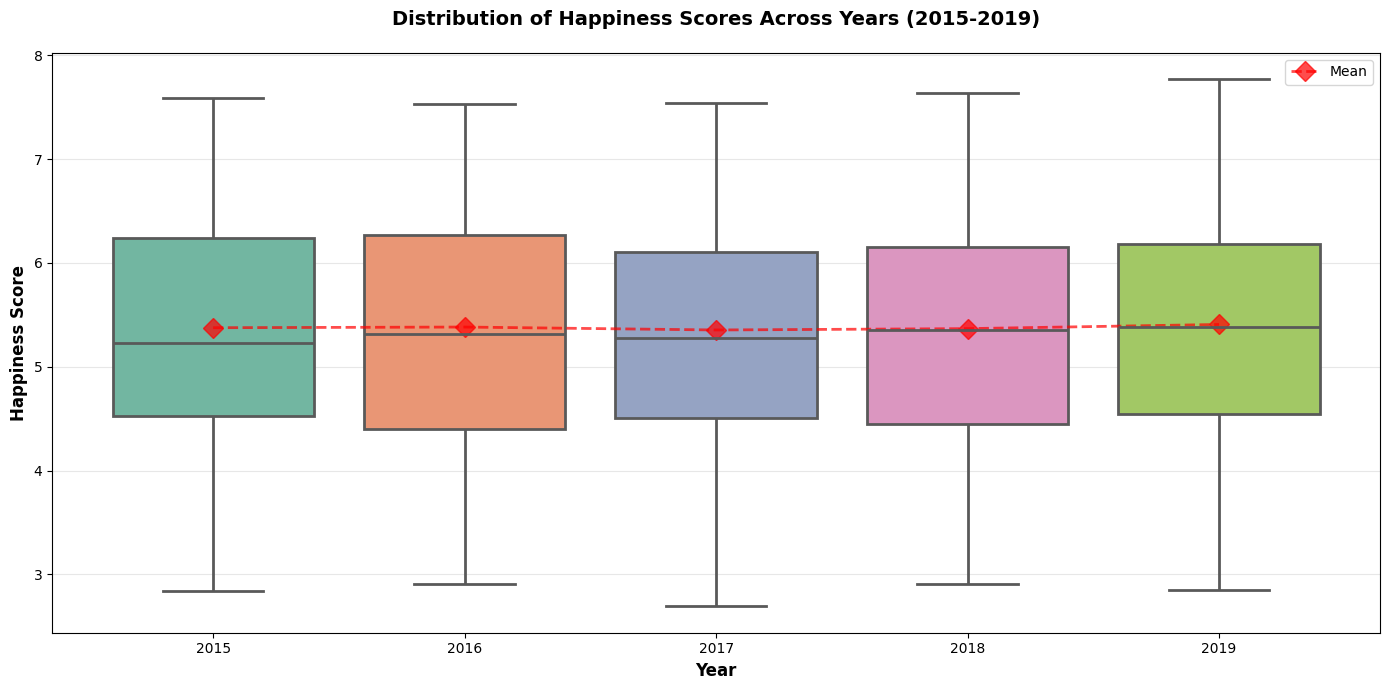


Statistical Summary by Year:
      count   mean    std    min    25%    50%    75%    max
Year                                                        
2015  158.0  5.376  1.145  2.839  4.526  5.232  6.244  7.587
2016  157.0  5.382  1.142  2.905  4.404  5.314  6.269  7.526
2017  155.0  5.354  1.131  2.693  4.506  5.279  6.102  7.537
2018  155.0  5.367  1.117  2.905  4.452  5.358  6.154  7.632
2019  156.0  5.407  1.113  2.853  4.544  5.380  6.184  7.769


In [19]:
# b) Box plot comparing distribution across years
plt.figure(figsize=(14, 7))
box_plot = sns.boxplot(data=df_combined, x='Year', y='Score', 
                       palette='Set2', linewidth=2)

# Customize
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=12, fontweight='bold')
plt.title('Distribution of Happiness Scores Across Years (2015-2019)', 
         fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)

# Add mean markers
means = df_combined.groupby('Year')['Score'].mean()
positions = range(len(means))
plt.plot(positions, means, marker='D', color='red', linewidth=2, 
         markersize=10, label='Mean', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

# Statistical summary
print("\nStatistical Summary by Year:")
print(df_combined.groupby('Year')['Score'].describe().round(3))

OUTLIER DETECTION - 2019 HAPPINESS SCORES (IQR Method)

Q1 (25th percentile): 4.545
Q3 (75th percentile): 6.184
IQR: 1.640
Lower Bound: 2.085
Upper Bound: 8.644

✓ No outliers detected using IQR method


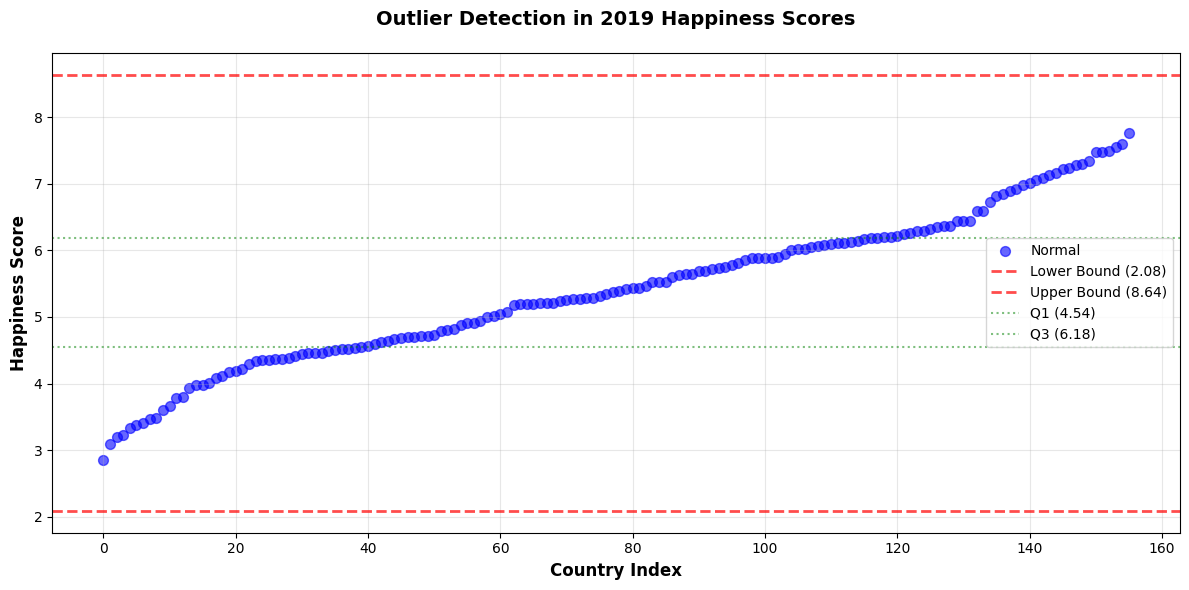

In [21]:
# c) Identify outliers using IQR method for 2019
Q1 = df_2019_analysis['Score'].quantile(0.25)
Q3 = df_2019_analysis['Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_2019_analysis[(df_2019_analysis['Score'] < lower_bound) | 
                            (df_2019_analysis['Score'] > upper_bound)]

print("="*80)
print("OUTLIER DETECTION - 2019 HAPPINESS SCORES (IQR Method)")
print("="*80)
print(f"\nQ1 (25th percentile): {Q1:.3f}")
print(f"Q3 (75th percentile): {Q3:.3f}")
print(f"IQR: {IQR:.3f}")
print(f"Lower Bound: {lower_bound:.3f}")
print(f"Upper Bound: {upper_bound:.3f}")

if len(outliers) > 0:
    print(f"\n🔍 Found {len(outliers)} outlier(s):\n")
    print(outliers[['Country', 'Score', 'Rank']].to_string(index=False))
else:
    print("\n✓ No outliers detected using IQR method")

# Visualize outliers
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df_2019_analysis)), df_2019_analysis['Score'].sort_values(), 
           c='blue', alpha=0.6, s=50, label='Normal')

if len(outliers) > 0:
    outlier_indices = df_2019_analysis[df_2019_analysis['Country'].isin(outliers['Country'])].index
    plt.scatter(outlier_indices, df_2019_analysis.loc[outlier_indices, 'Score'], 
               c='red', s=200, marker='*', label='Outliers', edgecolors='black', linewidth=2)

plt.axhline(y=lower_bound, color='r', linestyle='--', linewidth=2, alpha=0.7, label=f'Lower Bound ({lower_bound:.2f})')
plt.axhline(y=upper_bound, color='r', linestyle='--', linewidth=2, alpha=0.7, label=f'Upper Bound ({upper_bound:.2f})')
plt.axhline(y=Q1, color='g', linestyle=':', linewidth=1.5, alpha=0.5, label=f'Q1 ({Q1:.2f})')
plt.axhline(y=Q3, color='g', linestyle=':', linewidth=1.5, alpha=0.5, label=f'Q3 ({Q3:.2f})')

plt.xlabel('Country Index', fontsize=12, fontweight='bold')
plt.ylabel('Happiness Score', fontsize=12, fontweight='bold')
plt.title('Outlier Detection in 2019 Happiness Scores', fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### d) Summary of Key Findings

## 📊 KEY FINDINGS - WORLD HAPPINESS ANALYSIS (2015-2019)

### Main Insights:

1. **Global Happiness Trend**: The analysis reveals that global average happiness has remained relatively stable from 2015 to 2019, with minor fluctuations. The mean happiness score across all countries hovers around 5.4-5.5 on a scale of 0-10.

2. **Top Performers**: Nordic countries (Finland, Denmark, Norway, Iceland) and Western European nations consistently dominate the top rankings. Finland emerged as the happiest country in 2019 with a score of 7.769.

3. **Key Happiness Factors**: GDP per capita shows the strongest correlation with happiness scores (r > 0.78), followed by social support and healthy life expectancy. This suggests that economic prosperity and social connections are fundamental to national happiness.

4. **Regional Disparities**: Europe maintains the highest average happiness score (6.5+), while African nations show significantly lower scores (average around 4.0). This highlights substantial global inequality in well-being.

5. **Improvement Stories**: Several countries showed remarkable improvement from 2015 to 2019, while others experienced significant declines, often correlating with political instability or economic challenges.

6. **Outliers**: The IQR analysis identified both exceptionally happy and struggling nations, emphasizing the wide spectrum of human well-being globally.

### Recommendations:
- Policymakers should focus on economic development, healthcare, and social support systems
- Countries with declining happiness need targeted interventions
- Best practices from top-performing nations should be studied and adapted

---

**End of Examination**